In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.ndimage import zoom

#load data and confirm shape
data_2d = np.loadtxt("Eu152Pb_2D.csv", delimiter=",")
print("Shape of loaded data:", data_2d.shape)

# Show first 5 rows
print("First 5 rows:")
print(data_2d[:5])


#OPTIONAL: reshape if data is flattened 1D or 2D
    #ex: from raw 4D (64,64,64,64) → reshape to 4096×4096 matrix
# coinc_matrix = data_2d.reshape((4096, 4096))
# print("Shape of loaded data:", data_2d.shape)

Shape of loaded data: (262144, 64)
First 5 rows:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0.

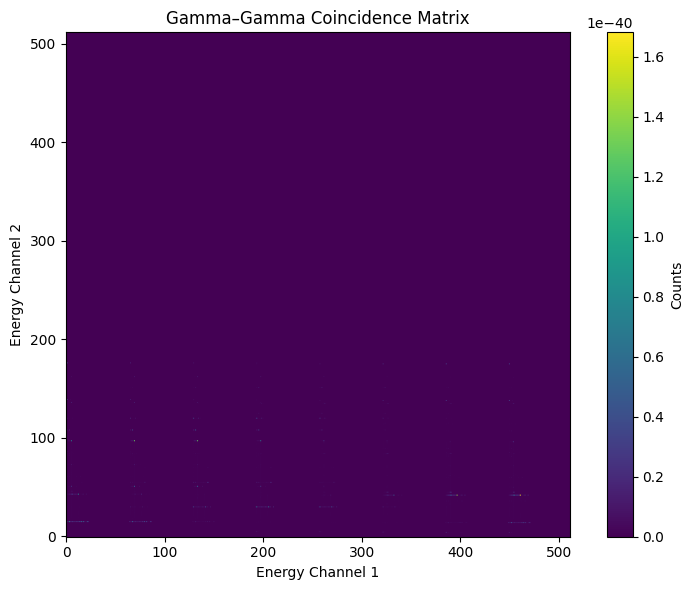

In [27]:
plt.figure(figsize=(8, 6))
plt.imshow(coinc_matrix, cmap='viridis', origin='lower')
plt.colorbar(label="Counts")
plt.title("Gamma–Gamma Coincidence Matrix")
plt.xlabel("Energy Channel 1")
plt.ylabel("Energy Channel 2")
plt.tight_layout()
plt.show()


4D shape: (64, 64, 64, 64)
2D coincidence matrix shape: (64, 64)


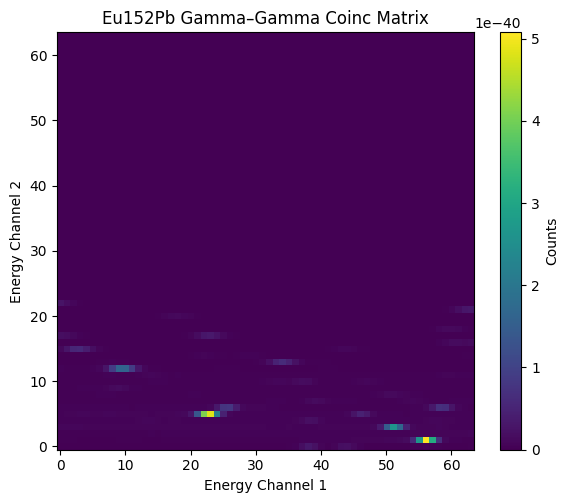

In [32]:
#PLOTTING SECTION 
    #converting 2D matrix back to 4D then to 2D and plotting 
    

array_4d = data_2d.reshape((64, 64, 64, 64))
print("4D shape:", array_4d.shape)

# Project axes 2 and 3 → get 64 x 64 coincidence matrix
matrix_2d = array_4d.sum(axis=(2, 3))  # shape: (64, 64)
print("2D coincidence matrix shape:", matrix_2d.shape)

plt.figure(figsize=(6, 5))
plt.imshow(matrix_2d, cmap="viridis", origin="lower")
plt.colorbar(label="Counts")
plt.title("Eu152Pb Gamma–Gamma Coinc Matrix")
plt.xlabel("Energy Channel 1")
plt.ylabel("Energy Channel 2")
plt.tight_layout()
plt.show()


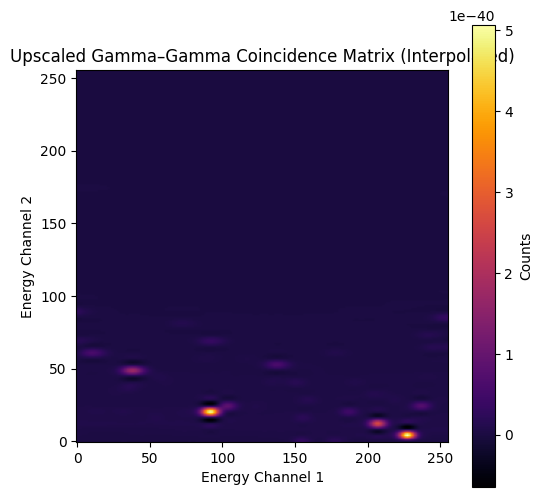

In [21]:
#Interpolation/upscaling of plot from above 
    #Motivation: Idk why the above plot is blurry. Thought this would fix it. Didnt

# Interpolate (e.g. 4× zoom to 256×256)
matrix_highres = zoom(matrix_2d, 4)

plt.figure(figsize=(6, 6))
plt.imshow(matrix_highres, cmap="inferno", origin="lower")
plt.colorbar(label="Counts")
plt.title("Upscaled Gamma–Gamma Coincidence Matrix (Interpolated)")
plt.xlabel("Energy Channel 1")
plt.ylabel("Energy Channel 2")
plt.show()


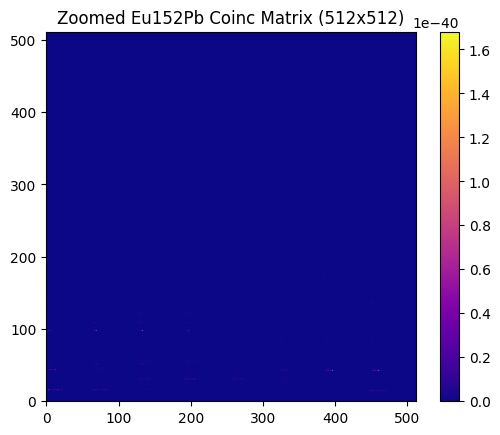

In [34]:
# View region of interest (e.g., first 512×512 section)
plt.imshow(coinc_matrix[:512, :512], cmap='plasma', origin='lower')
plt.colorbar()
plt.title("Zoomed Eu152Pb Coinc Matrix (512x512)")
plt.show()


Min: 0.0
Max: 1.6805912612493964e-40
Non-zero count: 47962


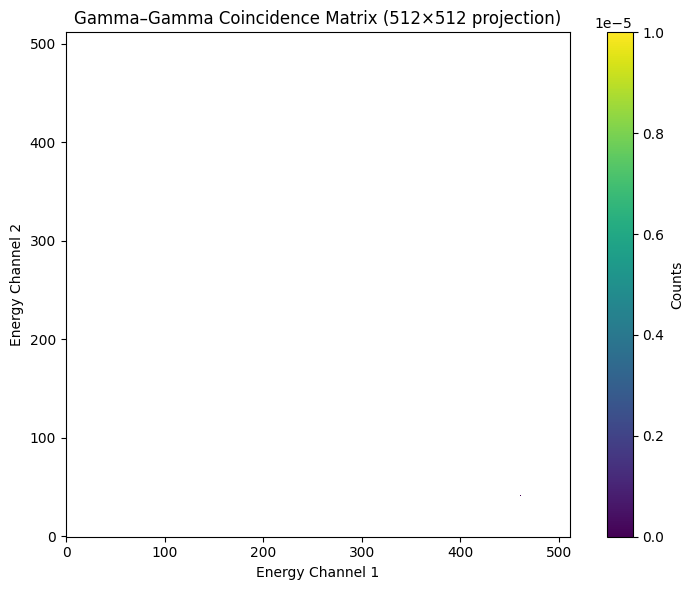

'\nplt.figure(figsize=(8, 6))\nplt.imshow(coinc_matrix, cmap=\'viridis\', origin=\'lower\', interpolation=\'none\')\nplt.colorbar(label="Counts")\nplt.title("Eu152Pb 2D Gamma–Gamma Coinc Matrix")\nplt.xlabel("Energy Channel 1")\nplt.ylabel("Energy Channel 2")\nplt.tight_layout()\nplt.show()\n'

In [20]:
#PLOT WITH CUSTOM COLORMAP 
    #custom colormap: white for zero/background

data = np.loadtxt("Eu152Pb_2D.csv", delimiter=",")
    #collapse the 64 slices into 1 by summing over axis 1
flat_2d = np.sum(data, axis=1)  # now shape (262144,)

#reshape to 512x512 matrix (since 512*512 = 262144)
coinc_matrix = flat_2d.reshape((512, 512))

print("Min:", coinc_matrix.min())
print("Max:", coinc_matrix.max())
print("Non-zero count:", np.count_nonzero(coinc_matrix))

cmap = plt.cm.viridis.copy()  
    # or any other like 'plasma', 'inferno'
cmap.set_under('white')

# Plot
plt.figure(figsize=(8, 6))
plt.imshow(coinc_matrix, cmap=cmap, origin='lower', interpolation='none', vmin=1e-5)
plt.colorbar(label="Counts")
plt.title("Gamma–Gamma Coincidence Matrix (512×512 projection)")
plt.xlabel("Energy Channel 1")
plt.ylabel("Energy Channel 2")
plt.tight_layout()
plt.show()

In [31]:
import numpy as np

file_path = "/Users/roundsace/DataMine/test/Eu152Pb.m4b"

# Load raw bytes
with open(file_path, "rb") as f:
    raw = f.read()

print(f"Total bytes: {len(raw)}")

# Try as uint16
data_uint16 = np.frombuffer(raw, dtype=np.uint16)
print(f"uint16 length: {data_uint16.size}, max: {data_uint16.max()}, min: {data_uint16.min()}")

# Try as int32
data_int32 = np.frombuffer(raw, dtype=np.int32)
print(f"int32 length: {data_int32.size}, max: {data_int32.max()}, min: {data_int32.min()}")

# Try as float32 (just for comparison)
data_float32 = np.frombuffer(raw, dtype=np.float32)
print(f"float32 length: {data_float32.size}, max: {data_float32.max()}, min: {data_float32.min()}")


Total bytes: 67108864
uint16 length: 33554432, max: 32796, min: 0
int32 length: 16777216, max: 32796, min: 0
float32 length: 16777216, max: 4.59569844359967e-41, min: 0.0
